In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import cm, colors
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# parameters


**Figure 1 -- ECI(software, trade, technology, research) comparison**

In [121]:
# data from code/01_data_prep_complexity.ipynb	
df = pd.read_csv("../outputs/eci_comparisons_2020.csv", sep=";")

# filter for developer counts or missing values
df2 = df[["iso2_code", "software_eci_2020", "trade_eci_2020", "tech_eci_2020", "research_eci_2020"]].dropna().reset_index(drop=True)

R2 0.593 p-value 0.0    software - trade
R2 0.61 p-value 0.0    software - technology
R2 0.529 p-value 0.0    software - research


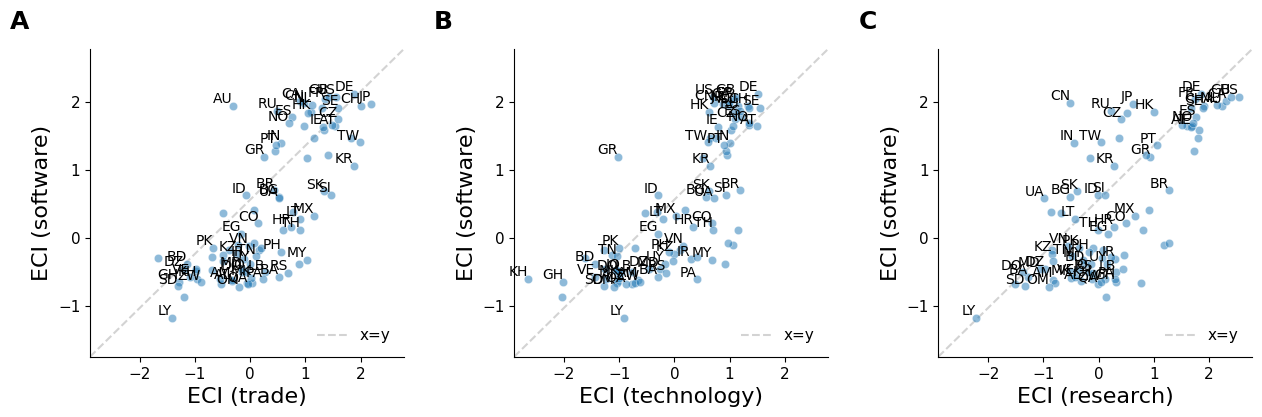

In [142]:
# ECI comparison
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.subplots_adjust(wspace=0.35)
fontsize = 16


# for axis setting
min_value = df2[["software_eci_2020", "trade_eci_2020", "tech_eci_2020", "research_eci_2020"]].min().min() - 0.25
max_value = df2[["software_eci_2020", "trade_eci_2020", "tech_eci_2020", "research_eci_2020"]].max().max() + 0.25


# A -- software vs trade
sns.scatterplot(x="trade_eci_2020", y="software_eci_2020", data=df2, alpha=0.5, ax=ax[0])
#sns.regplot(x="trade_eci_2020", y="seci_2020", data=df2, scatter=False, ci=95, ax=ax[0])
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['trade_eci_2020'], df2['software_eci_2020'])
r_squared = r_value ** 2
print("R2", round(r_squared, 3), "p-value", round(p_value, 3), "   software - trade")
#ax[0].annotate(f'R2: {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
ax[0].set_xlabel("ECI (trade)", size=fontsize)
ax[0].set_ylabel("ECI (software)", size=fontsize)

for i, label in enumerate(df2["iso2_code"]):
    # show labels for every other data point
    if i % 3 != 0:
        ax[0].text(
            df2["trade_eci_2020"][i],
            df2["software_eci_2020"][i],
            label,
            fontsize=fontsize-6,
            ha='right' if i % 3 != 0 else 'left', va='bottom' if i % 3 != 0 else 'top'
        )


# B -- software vs technology
sns.scatterplot(x="tech_eci_2020", y="software_eci_2020", data=df2, alpha=0.5, ax=ax[1])
slope, intercept, r_value, p_value, std_err = stats.linregress(df2["tech_eci_2020"], df2["software_eci_2020"])
r_squared = r_value ** 2
print("R2", round(r_squared, 3), "p-value", round(p_value, 3), "   software - technology")
ax[1].set_xlabel("ECI (technology)", size=fontsize)
ax[1].set_ylabel("ECI (software)", size=fontsize)

for i, label in enumerate(df2["iso2_code"]):
    # show labels for every other data point
    if i % 3 != 0:
        ax[1].text(
            df2["tech_eci_2020"][i],
            df2["software_eci_2020"][i],
            label,
            fontsize=fontsize-6,
            ha='right' if i % 3 != 0 else 'left', va='bottom' if i % 3 != 0 else 'top'
        )


# C -- software vs research
sns.scatterplot(x="research_eci_2020", y="software_eci_2020", data=df2, alpha=0.5, ax=ax[2])
slope, intercept, r_value, p_value, std_err = stats.linregress(df2["research_eci_2020"], df2["software_eci_2020"])
r_squared = r_value ** 2
print("R2", round(r_squared, 3), "p-value", round(p_value, 3), "   software - research")
ax[2].set_xlabel("ECI (research)", size=fontsize)
ax[2].set_ylabel("ECI (software)", size=fontsize)

for i, label in enumerate(df2["iso2_code"]):
    # show labels for every other data point
    if i % 3 != 0:
        ax[2].text(
            df2["research_eci_2020"][i],
            df2["software_eci_2020"][i],
            label,
            fontsize=fontsize-6,
            ha='right' if i % 3 !=  0 else 'left', va='bottom' if i % 3 != 0 else 'top'
        )


# common axis settings
for p in [0,1,2]:
    ax[p].tick_params("x", labelsize=(fontsize-5))
    ax[p].tick_params("y", labelsize=(fontsize-5))
    ax[p].spines['top'].set_visible(False)
    ax[p].spines['right'].set_visible(False)
    ax[p].set_xlim(min_value, max_value)
    ax[p].set_ylim(-1.75, max_value)
    ax[p].plot(ax[p].get_xlim(), ax[p].get_ylim(), ls="--", c="lightgrey", label="x=y", zorder=0)
    ax[p].legend(loc="lower right", frameon=False, prop={'size': fontsize-5},)


# subplot title
for a, label in zip(ax, ['A','B','C','D']):
    a.annotate(label.upper(), xy=(0,1), xycoords='axes fraction', xytext=(-80,20), textcoords='offset pixels', weight='bold', size=fontsize+2)


# save
# plt.savefig(f"../figures/fig01_eci_comparison.png", dpi=300, bbox_inches="tight", facecolor="white")

In [113]:
for i, label in enumerate(df2["iso2_code"]):
    if i % 10 == 0:
        print(i, label)

0 US
10 ID
20 IT
30 IL
40 NG
50 FI
60 TN
70 SI
80 BA
90 SN
100 DE
110 NL
120 SE
130 BE
140 NO
150 BG
160 HR
170 LB
180 KW
190 US
200 ID
210 IT
220 EG
230 SA
240 IE
250 LK
260 DO
270 UZ
280 MN
290 RU
300 UA
310 SG
320 RO
330 MA
340 AE
350 HR
360 LB
370 MK
380 US
390 ID
400 IT
410 EG
420 SA
430 IE
440 LK
450 JO
460 KH
470 MN
480 RU
490 TR
500 SG
510 IR
520 MA
530 AE
540 HR
550 LB
560 MK
570 US
580 FR
590 PL
600 EG
610 SA
620 HU
630 TN
640 JO
650 AM
660 MN
670 RU
680 VN
690 SG
700 IR
710 DK
720 GR
730 CR
740 LB
750 MK
760 US
770 FR
780 NL
790 BD
800 SA
810 HU
820 BG
830 UZ
840 AM
850 OM
860 RU
870 AU
880 SG
890 IR
900 DK
910 GR
920 CR
930 UY
940 UG
950 US
960 FR
970 PL
980 EG
990 CH
1000 HU
1010 BG
1020 SK
1030 SI
1040 OM
1050 RU
1060 TR
1070 SG
1080 IR
1090 DK
1100 KE
1110 UZ
1120 UY
1130 UG
1140 US
1150 FR
1160 NL
1170 BD
1180 CH
1190 FI
1200 BG
1210 SK
1220 SI
1230 OM
1240 RU
1250 VN
1260 SG
1270 IR
1280 DK
1290 NZ
1300 UZ
1310 AZ
1320 UG
1330 US
1340 FR
1350 NL
1360 TH
1370 BE
1380 FI

In [34]:
df2

,developers,iso2_code,year,quarter,software_eci_2020,trade_eci_2020,tech_eci_2020,research_eci_2020
0,9763122,US,2020,1,2.077565,1.546470,0.705041,2.537689
2,5885036,CN,2020,1,1.989880,0.974141,0.718646,-0.518842
3,4194257,IN,2020,1,1.396328,0.561378,1.003936,-0.452817
4,1635516,GB,2020,1,2.077218,1.422834,1.107142,2.389724
5,1400662,BR,2020,1,0.700036,0.439039,1.180880,1.280930
...,...,...,...,...,...,...,...,...
3251,43371,OM,2023,3,-0.715562,-0.205464,-1.095169,-0.898356
3253,40195,SN,2023,3,-0.478025,-0.696586,-1.063301,-0.374290
3256,36333,ZW,2023,3,-0.653262,-0.893569,-0.623640,0.050819
3261,32219,SD,2023,3,-0.715144,-1.311213,-1.279031,-1.337562
